In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df=pd.read_csv('dataset/LS_2.0.csv')

## Brief overview of dataset

In [127]:
df1=df[df['PARTY']!='NOTA']
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


## India has the highest number of young voters in the world. Lets see what was the distribution of age of the candidates in the 2019 election.

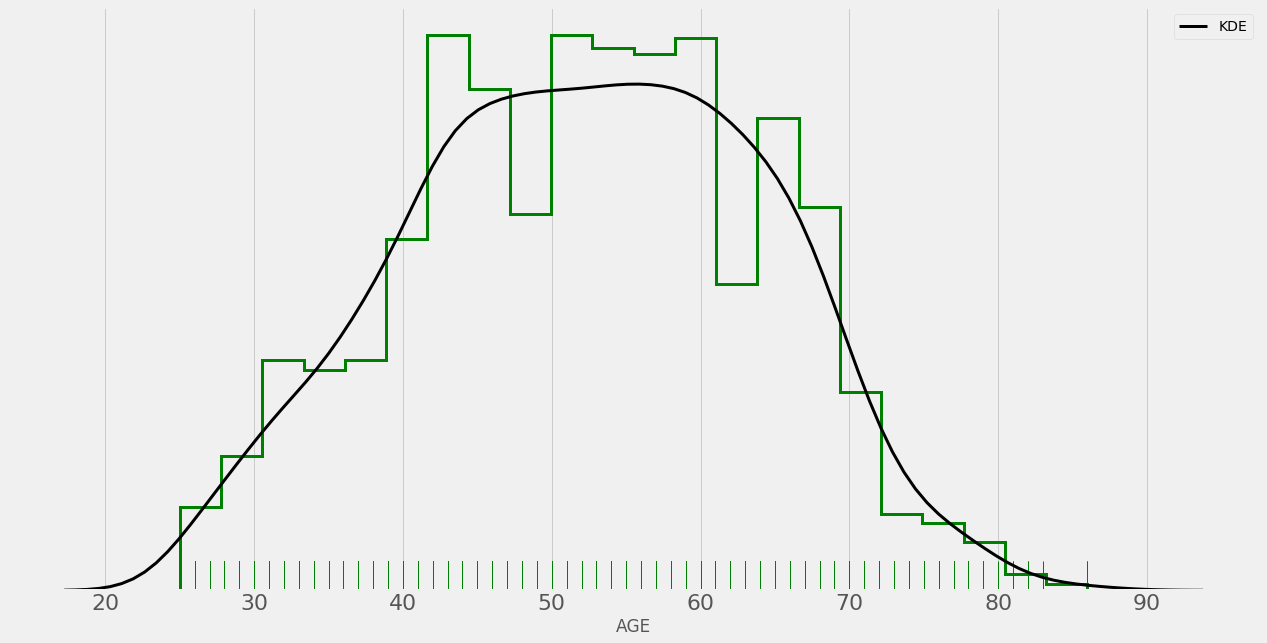

In [156]:
plt.figure(figsize=(20,10))
sns.distplot(df['AGE'],rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.yticks([])
plt.xticks(fontsize=22)
plt.show()

### We observe that the average age of a candidate is around 50 and was normally distributed

## Lets see the top constituencies with most candidates

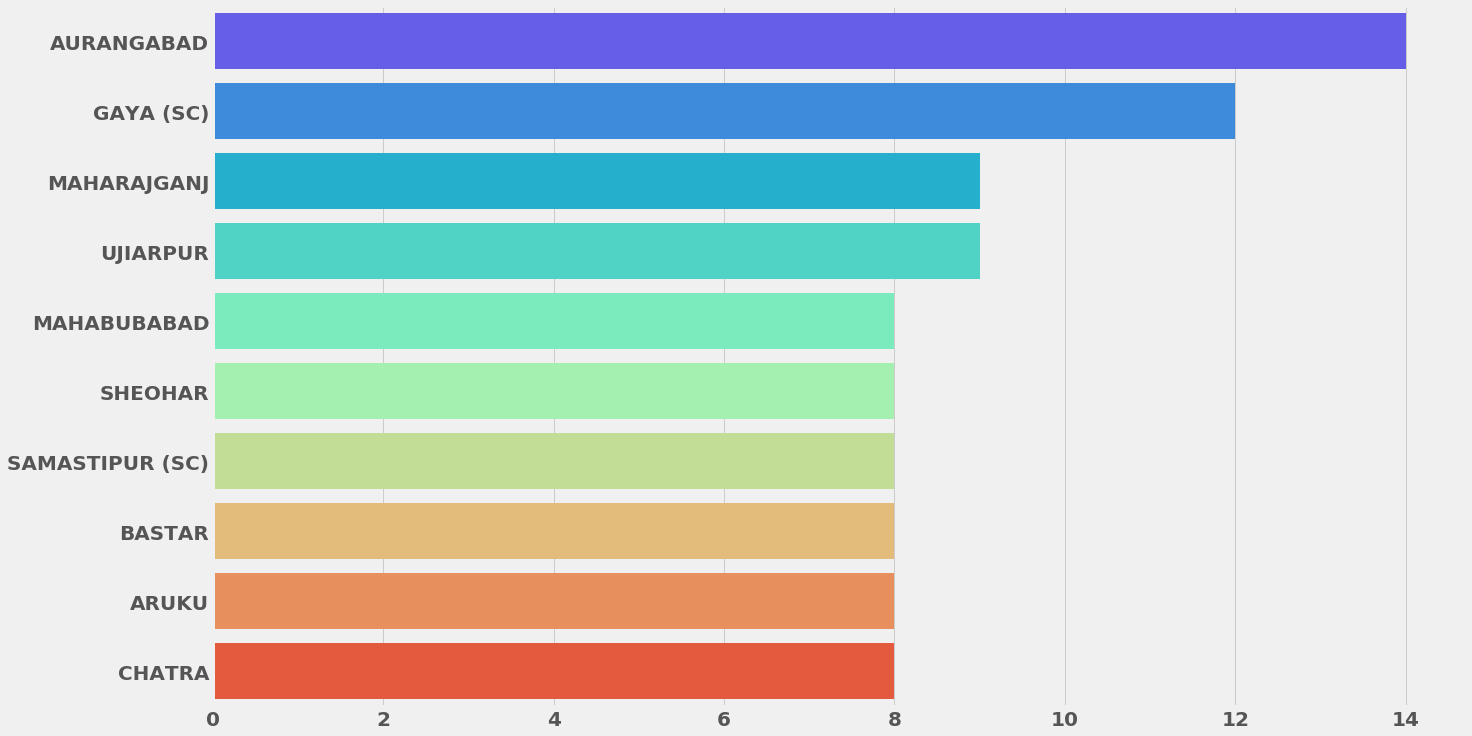

In [174]:
plt.figure(figsize=(20,12))
sns.countplot(y='CONSTITUENCY',data=df,order=df.CONSTITUENCY.value_counts().iloc[:10].index,palette='rainbow')
plt.ylabel('No of Candidates')
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=20,fontweight=1000)
plt.xlabel('')
plt.ylabel('')
plt.show()

## What was the total votes distribution?

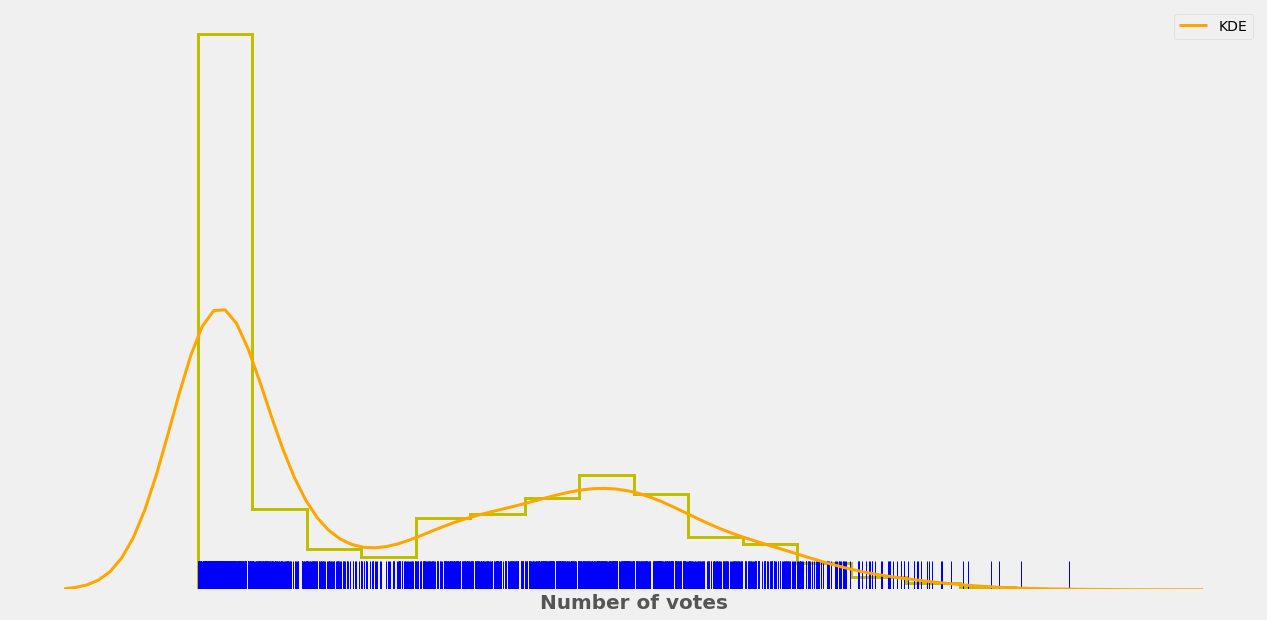

In [178]:
plt.figure(figsize=(20,10))
sns.distplot(df['TOTAL\nVOTES'],rug=True, rug_kws={"color": "b"},
                  kde_kws={"color": "orange", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "y"})
plt.xticks([])
plt.yticks([])
plt.xlabel('Number of votes',fontsize=20,fontweight='bold')
plt.show()

#### We can see that the total Number was votes is not normally distributed

## Number of candidates by each party

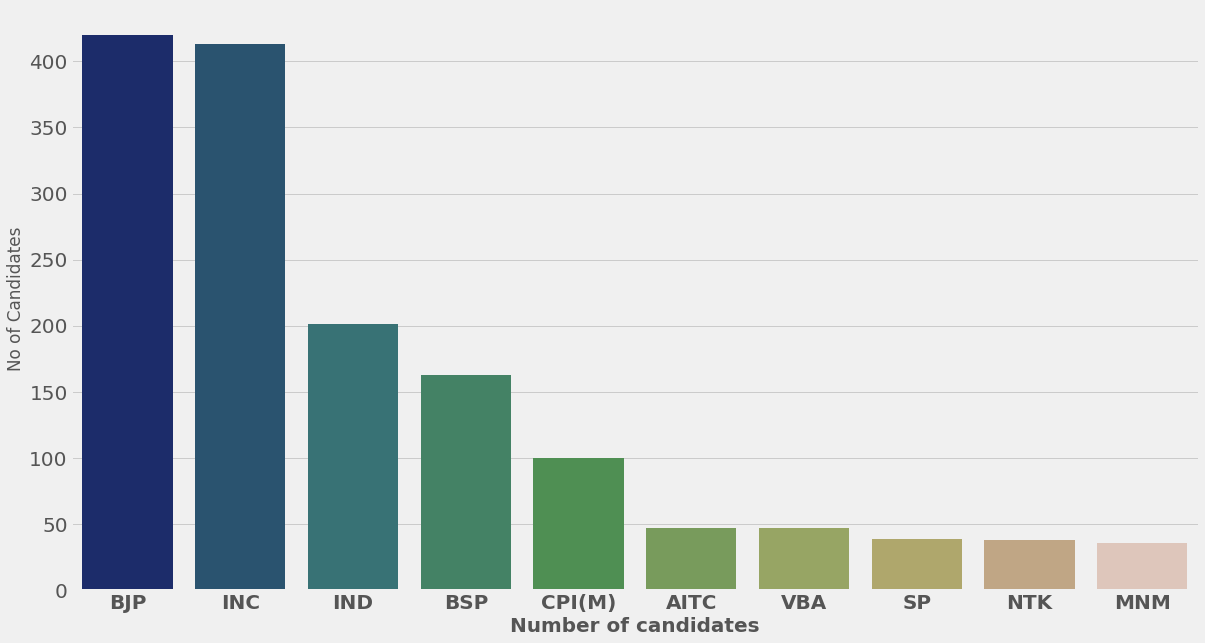

In [182]:
plt.figure(figsize=(18,10))
sns.countplot(x='PARTY',data=df1,order=df1.PARTY.value_counts().iloc[:10].index,palette='gist_earth')
plt.ylabel('No of Candidates')
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=20)
plt.xlabel('Party',fontsize=20,fontweight='bold')
plt.xlabel('Number of candidates',fontsize=20,fontweight='bold')
plt.show()

## Gender Distribution of candidates

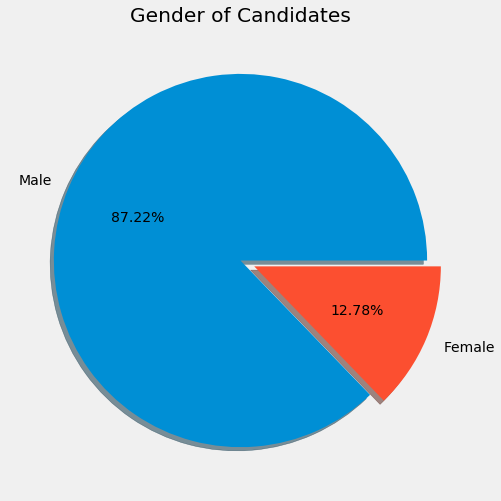

In [136]:
plt.figure(figsize=(16,8))
plt.pie(df['GENDER'].value_counts(),shadow=True,explode=[0,0.08],labels=['Male','Female'],autopct='%1.2f%%')
plt.title('Gender of Candidates')
plt.show()

#### We see there is a large gender bias in the number of candidates in our country

## Age Distribution of the candidates wrt gender and category

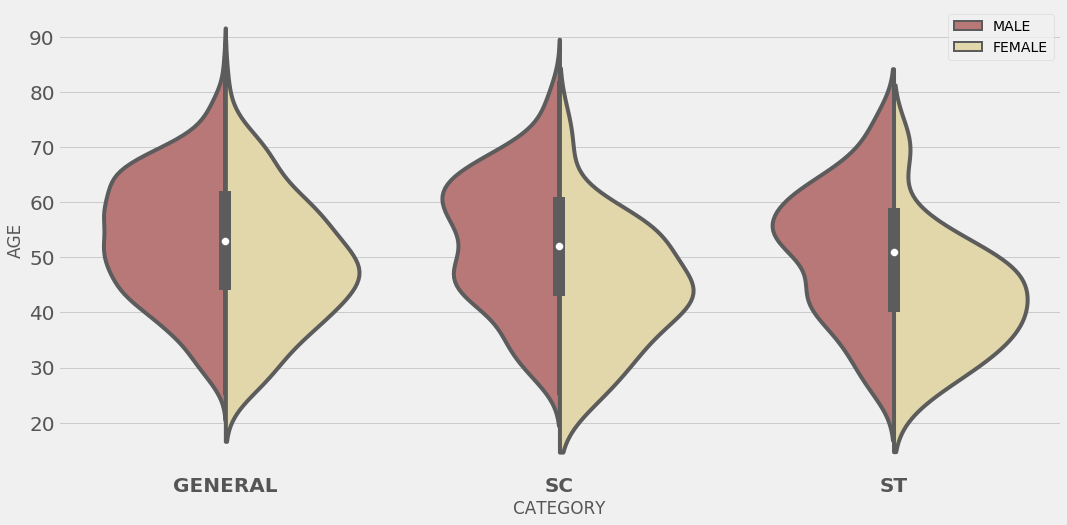

In [168]:
plt.figure(figsize=(16,8))
sns.violinplot(x='CATEGORY',y='AGE',data=df1,hue='GENDER',palette='pink',split=True,saturation=1.5,order=['GENERAL','SC','ST'])
plt.legend(loc='upper right')
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=20)
plt.show()

#### We observe that females have comparitively less mean age than males and the mean age of each category is approximately the same for both the genders

## Top 5 Candidates with highest vote percent and their education levels

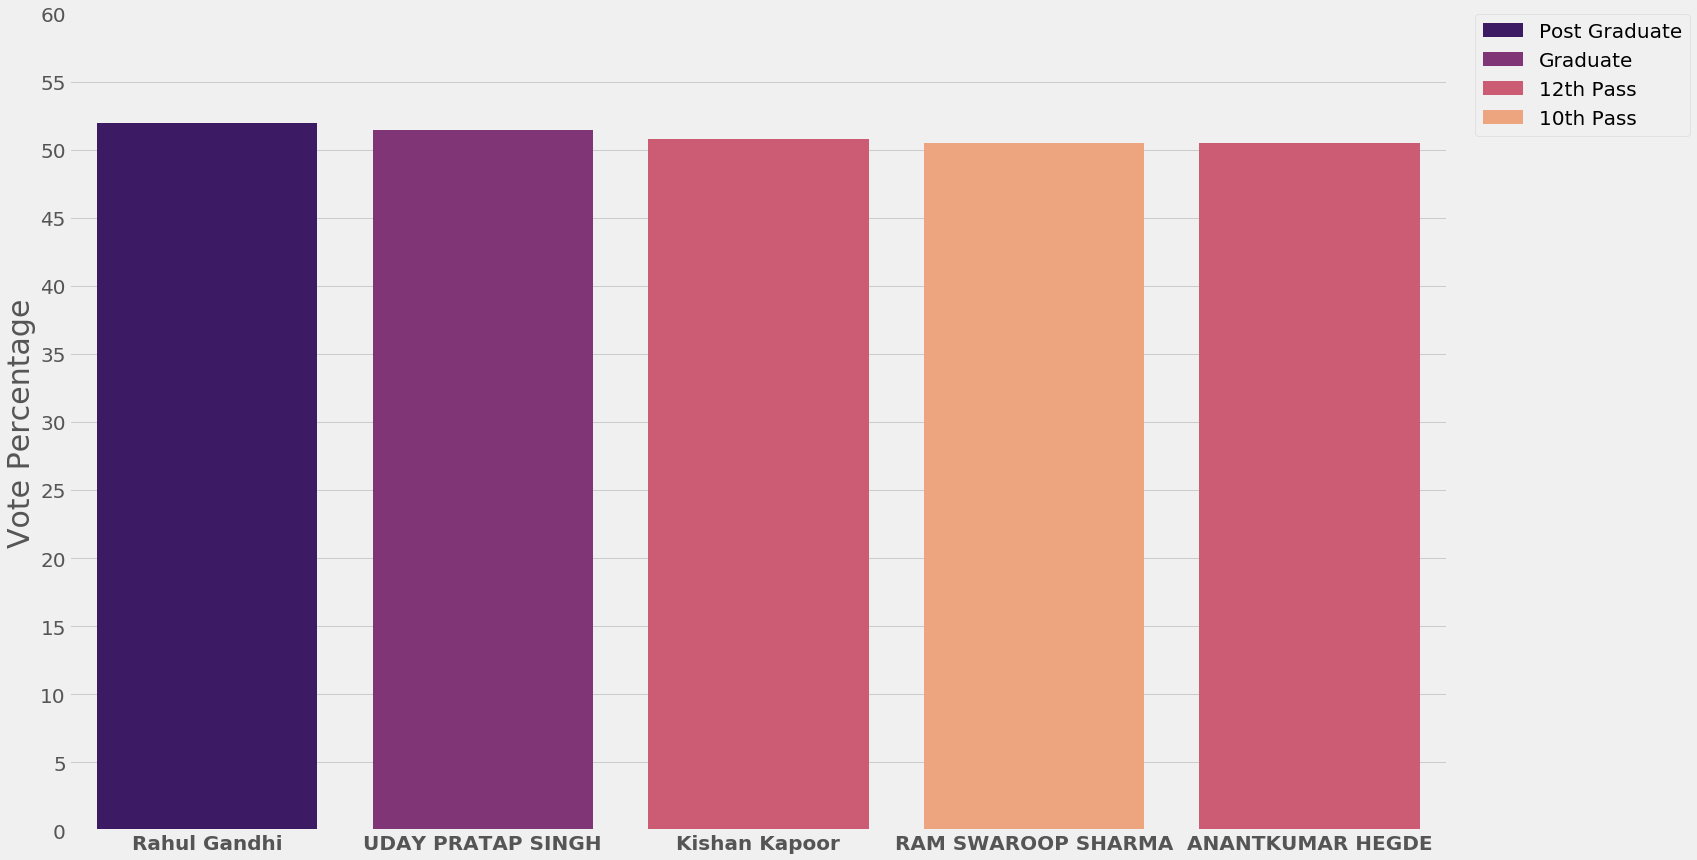

In [23]:
yt=np.arange(0,61,5)
df3=df1.copy()
df3['Vote Percent']=(df3['TOTAL\nVOTES']/df3['TOTAL ELECTORS'])*100
df3.sort_values(by='Vote Percent',axis=0,ascending=False,inplace=True)
df3=df3.head(5)
plt.figure(figsize=(22,14))
sns.barplot(x='NAME',y='Vote Percent',data=df3,hue='EDUCATION',dodge=False,palette='magma')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(yt,fontsize=20)
plt.ylabel('Vote Percentage',fontsize=30)
plt.xlabel('')
plt.show()

## Candidate Percentage with assets value

In [24]:
## cleaning data for assets column
df['ASSETS'].replace(['Not Available','Nil',np.nan,'`','Telangana'],'0',inplace=True)
a=df['ASSETS'].apply(lambda x:x.split()[1] if len(x.split())>1 else x.split()[0])
b=a.apply(lambda x:x.split(','))
c=b.apply(lambda x:''.join(x))
df['ASSETS']=c
df['ASSESTS']=df['ASSETS'].astype(int)
no=(df['ASSESTS']==0).sum()
th=((df['ASSESTS']>1000) & (df['ASSESTS']<100000)).sum()
lac=((df['ASSESTS']>100000) & (df['ASSESTS']<10000000)).sum()
cr=(df['ASSESTS']>10000000).sum()
data=[no,th,lac,cr]
labels=['No assets','Assets in Thousands','Assets in lacs','Assets in crores']
explode=[0,0,0,0.02]

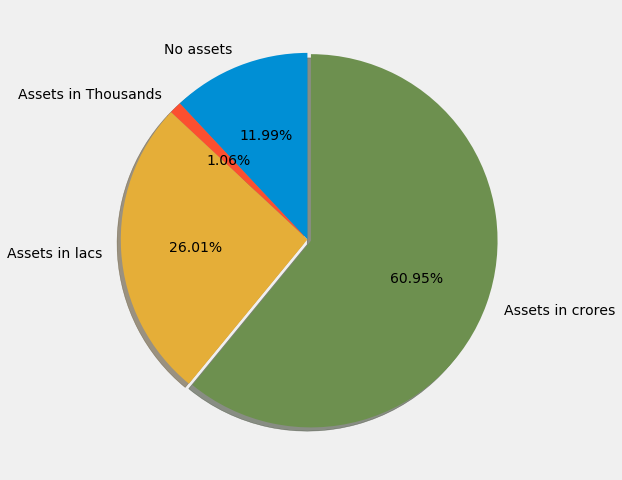

In [25]:
plt.figure(figsize=(16,8))
plt.pie(data,explode,labels=labels,autopct='%1.2f%%',startangle=90,shadow=True)
plt.show()

## Top Candidates With Highest number of Criminal Cases

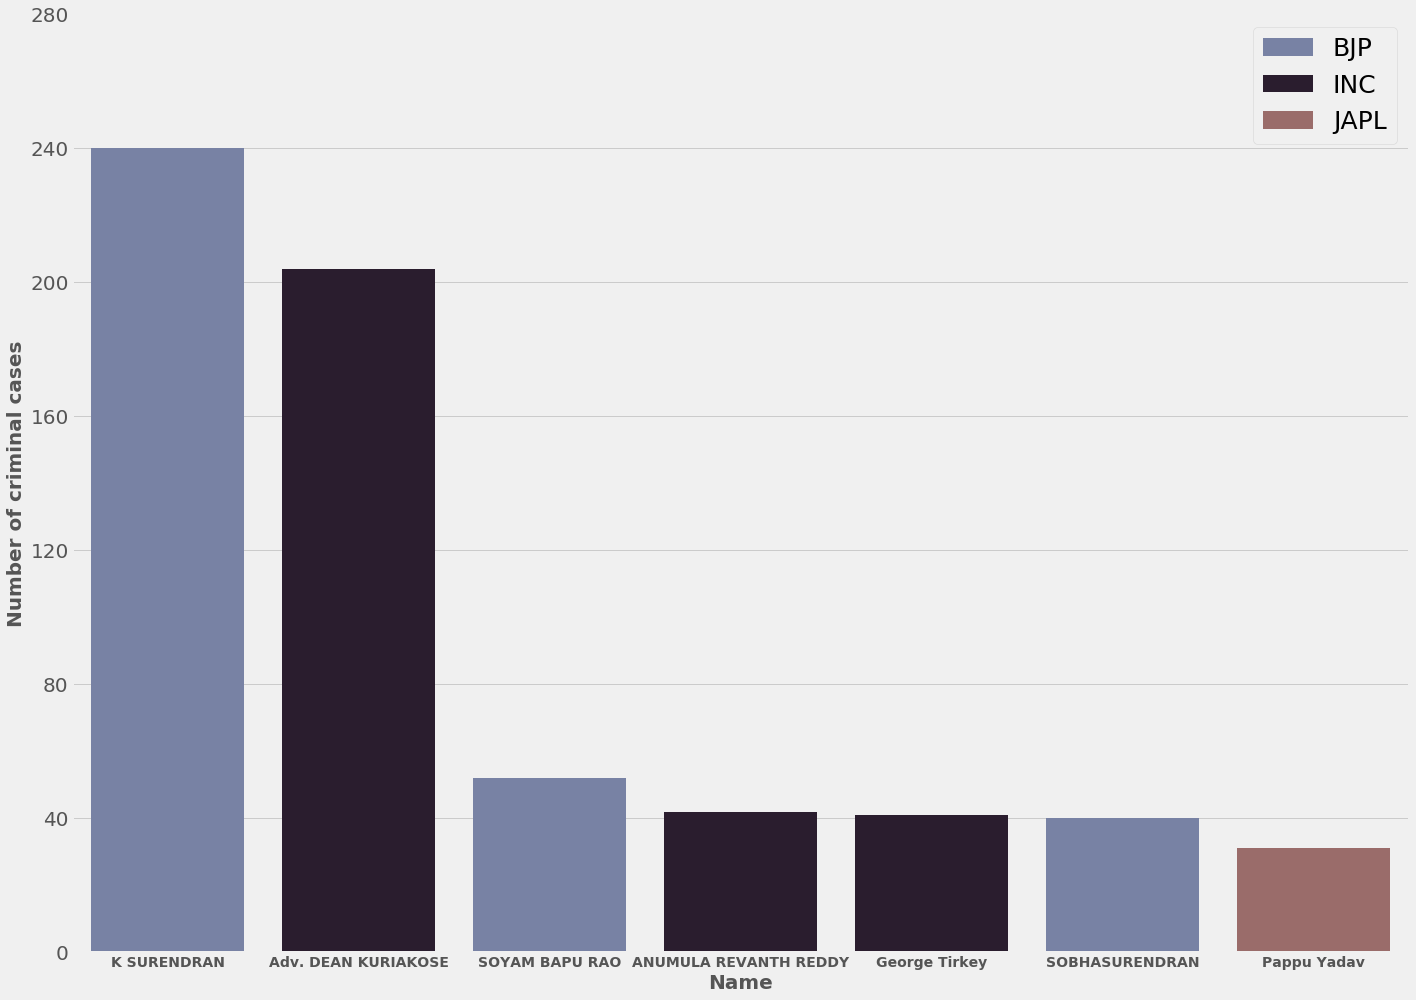

In [183]:
df['CRIMINAL\nCASES'].replace(['Not Available',np.nan],'0',inplace=True)
df['CRIMINAL\nCASES']=df['CRIMINAL\nCASES'].astype(float)
df3=df.copy()
df3.sort_values('CRIMINAL\nCASES',axis=0,ascending=False,inplace=True)
df3=df3.head(7)
plt.figure(figsize=(20,14))
sns.barplot(x='NAME',y='CRIMINAL\nCASES',data=df3,palette='twilight',hue='PARTY',dodge=False,saturation=0.5)
plt.tight_layout()
plt.legend(fontsize=25)
plt.xlabel('Name',fontsize=20,fontweight='bold')
plt.ylabel('Number of criminal cases',fontsize=20,fontweight='bold')
plt.xticks(fontsize=14,fontweight=1000)
plt.yticks(np.arange(0,281,40),fontsize=20)
plt.show()

## Analyzing the age distribution of candidates of the top 10 parties

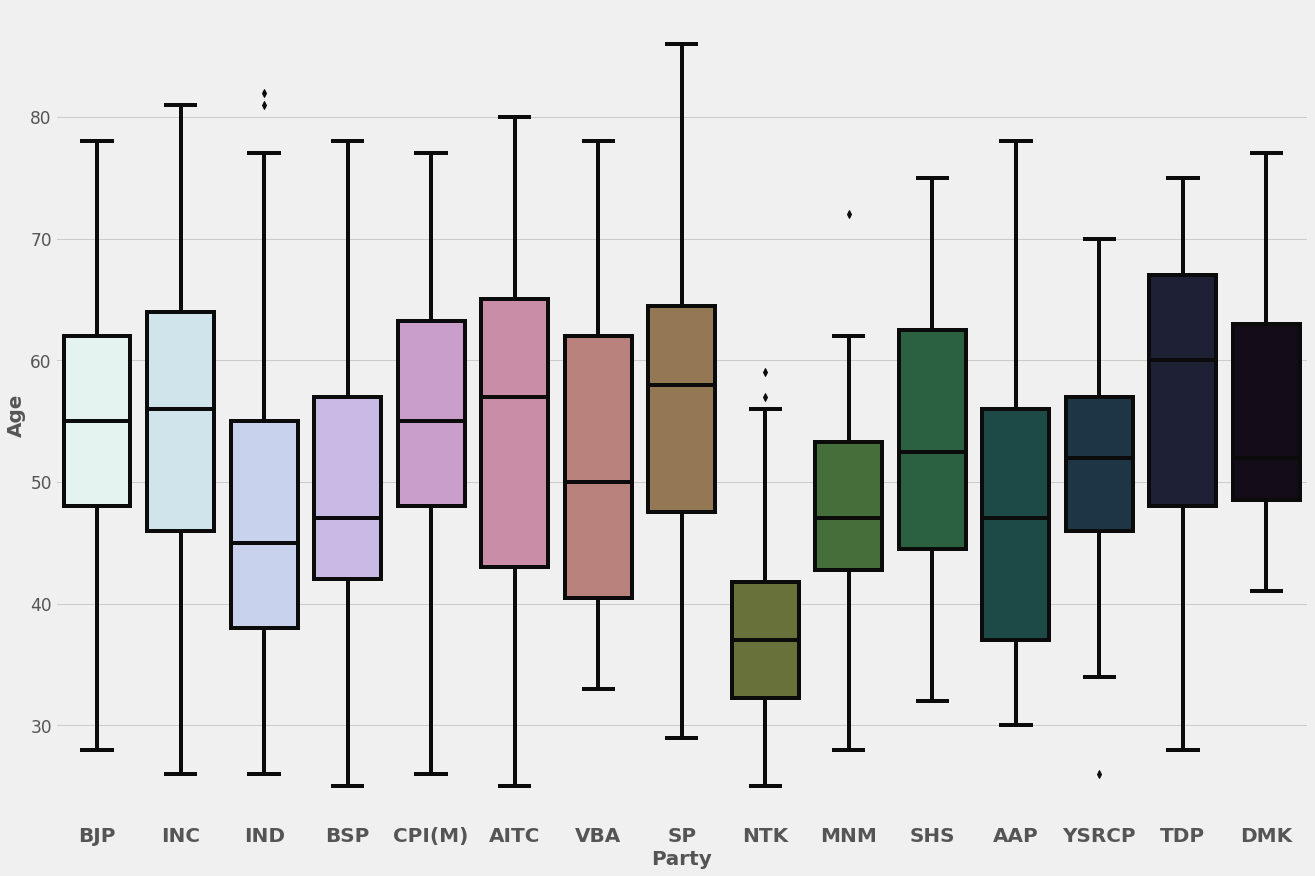

In [185]:
plt.figure(figsize=(20,14))
sns.boxplot(x='PARTY',y='AGE',data=df1,palette='cubehelix_r',order=df1.PARTY.value_counts().iloc[:15].index)
plt.xlabel('Party',fontdict={'fontsize':20})
plt.ylabel('Age',fontdict={'fontsize':20})
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=17)
plt.xlabel('Party',fontsize=20,fontweight='bold')
plt.ylabel('Age',fontsize=20,fontweight='bold')
plt.show()

#### We see that the party 'SP' has the most distributed candidates by their ages while NTK had the youngest candidates on an average

## Who were the youngest and the oldest winners in the election?

### Youngest MPs with their education :

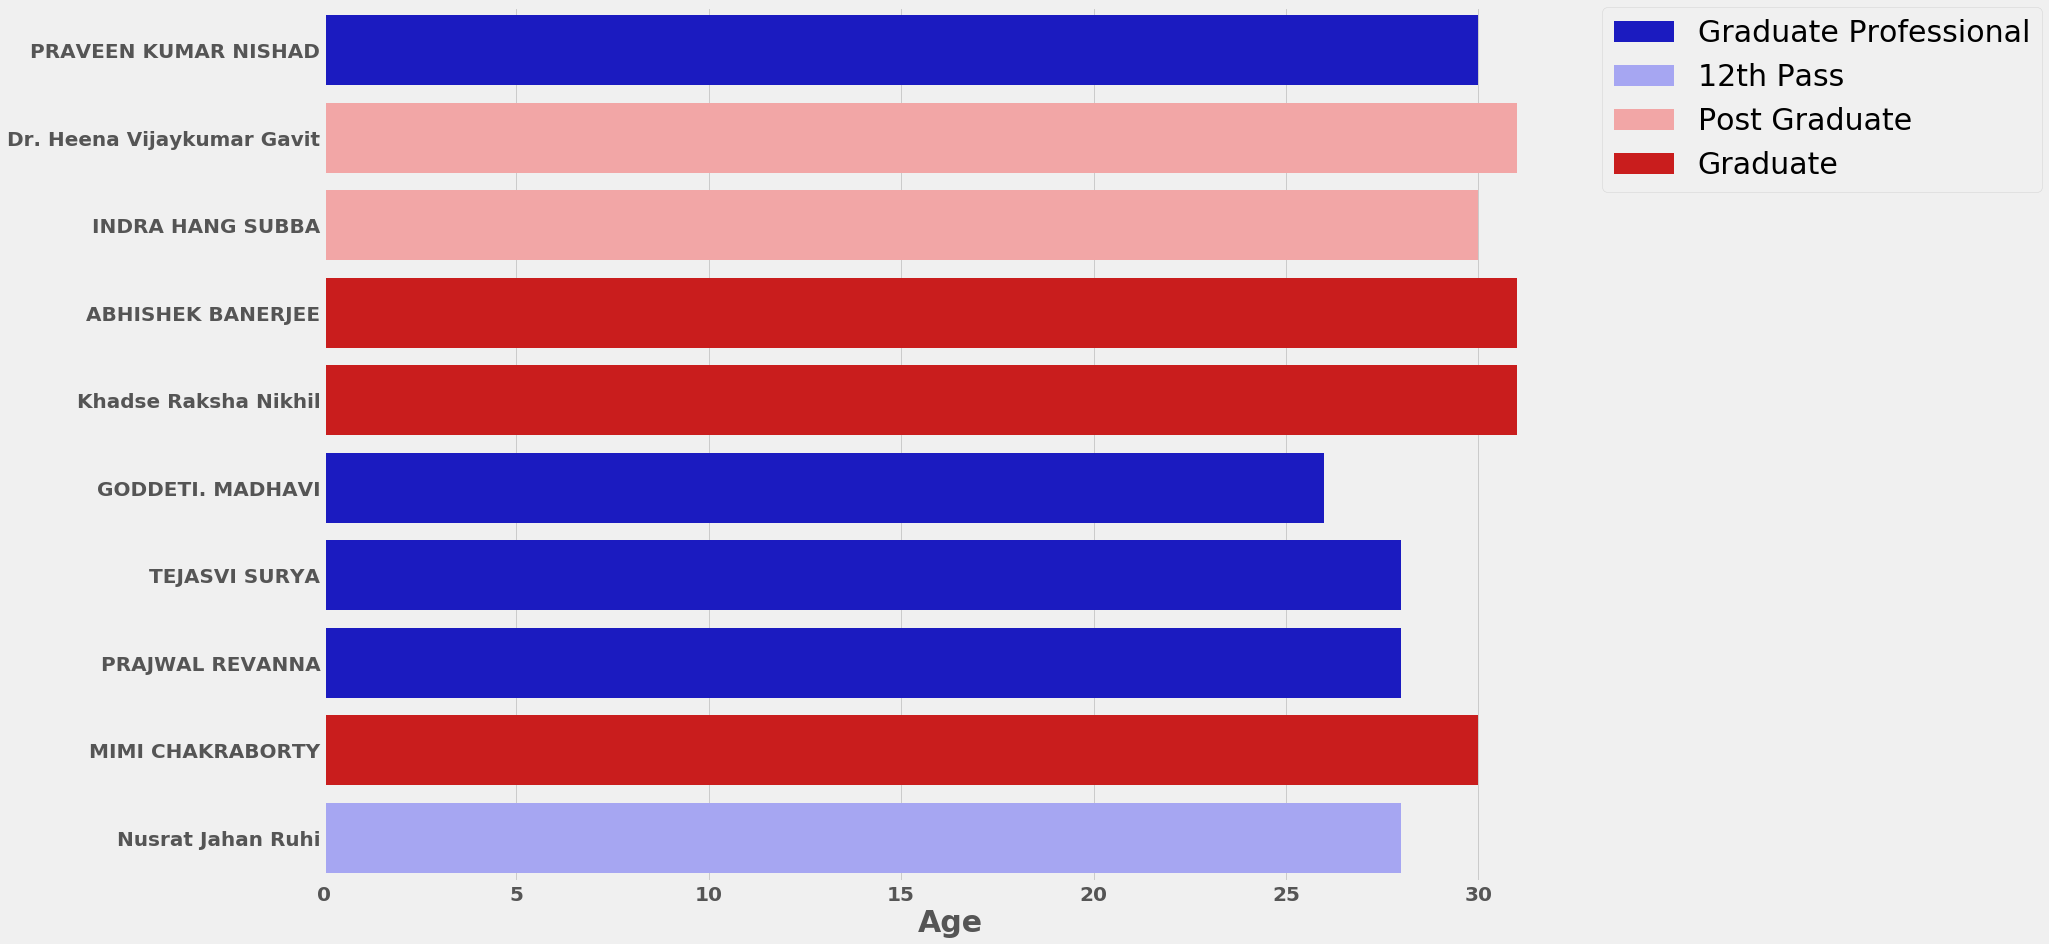

In [196]:
plt.figure(figsize=(20,15))
df4=df.sort_values('AGE')
df4=df4[df4['WINNER']==1].head(10)
sns.barplot(x='AGE',y='NAME',data=df4,order=df4.NAME.value_counts().iloc[:10].index,hue='EDUCATION',dodge=False,palette='seismic')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,fontsize=30)
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=20,fontweight=1000)
plt.xlabel('Age',fontsize=30,fontweight=1000)
plt.ylabel('')
plt.show()

## Eldest MPs with their parties:

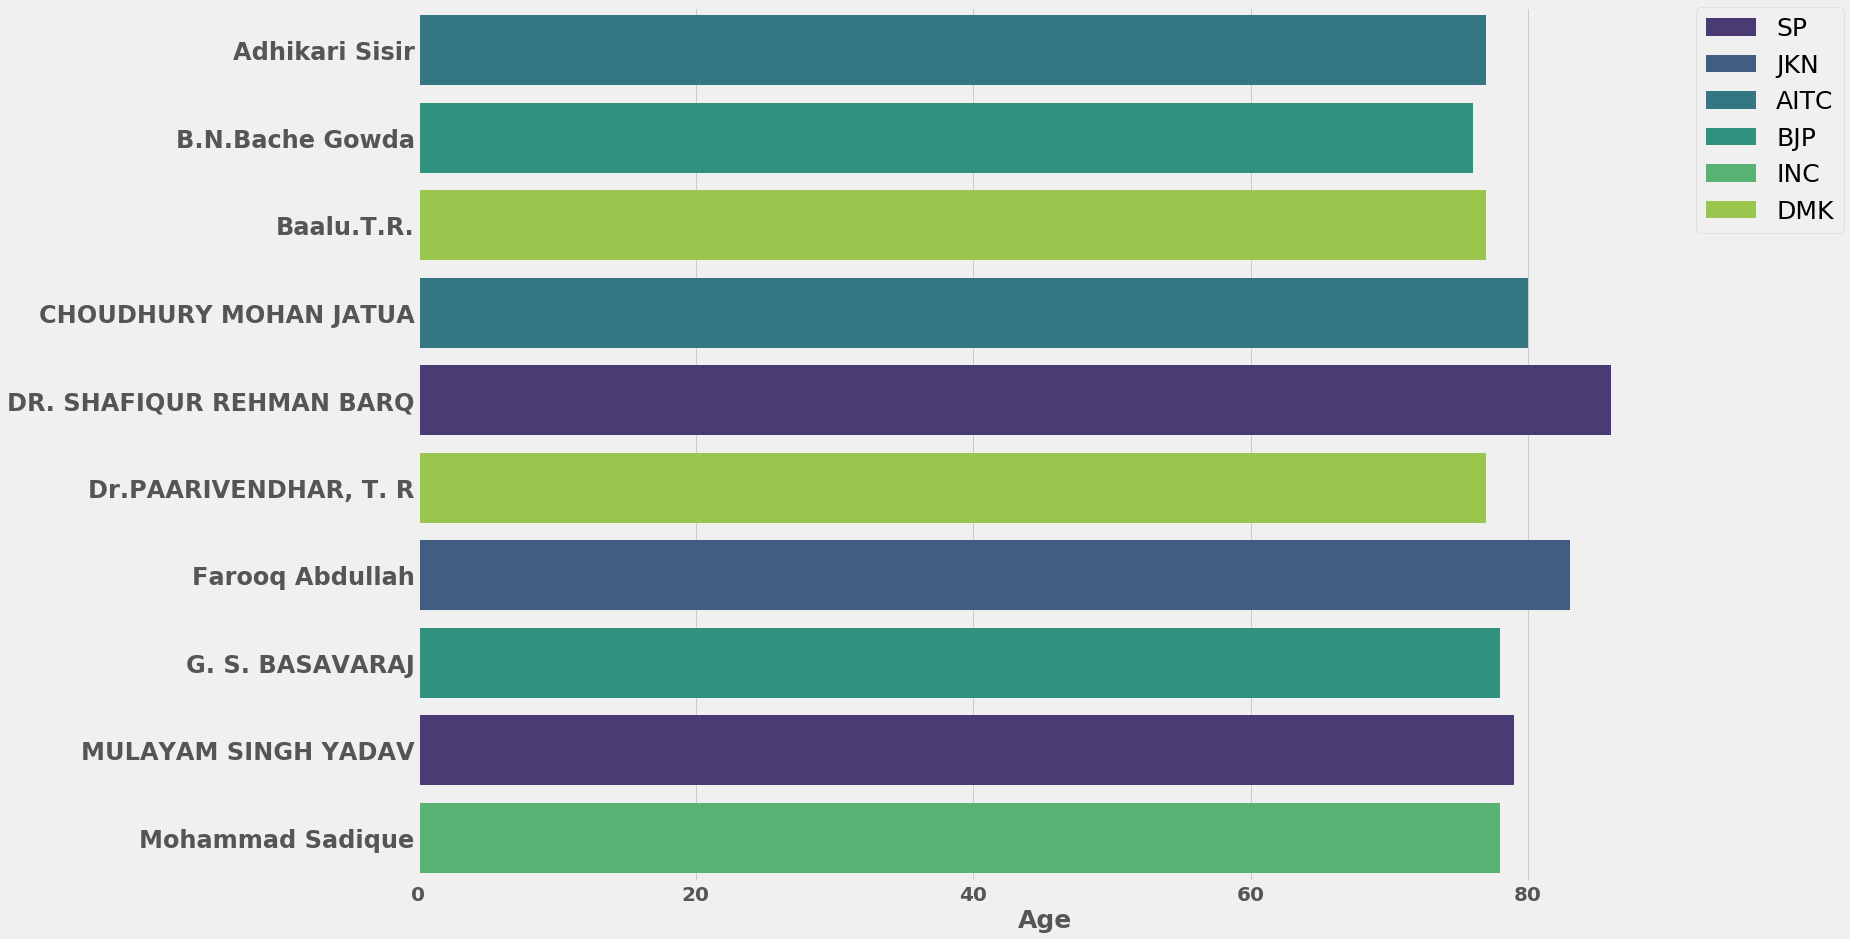

In [197]:
plt.figure(figsize=(20,15))
df4=df.sort_values('AGE',ascending=False)
df4=df4[df4['WINNER']==1].head(10)
sns.barplot(x='AGE',y='NAME',data=df4,order=df4.NAME.value_counts().iloc[:10].index.sort_values(),hue='PARTY',dodge=False,palette='viridis')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,fontsize=25)
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=24,fontweight=1000)
plt.xlabel('Age',fontsize=25,fontweight=1000)
plt.ylabel('')
plt.show()

## Constituencies which voted the most

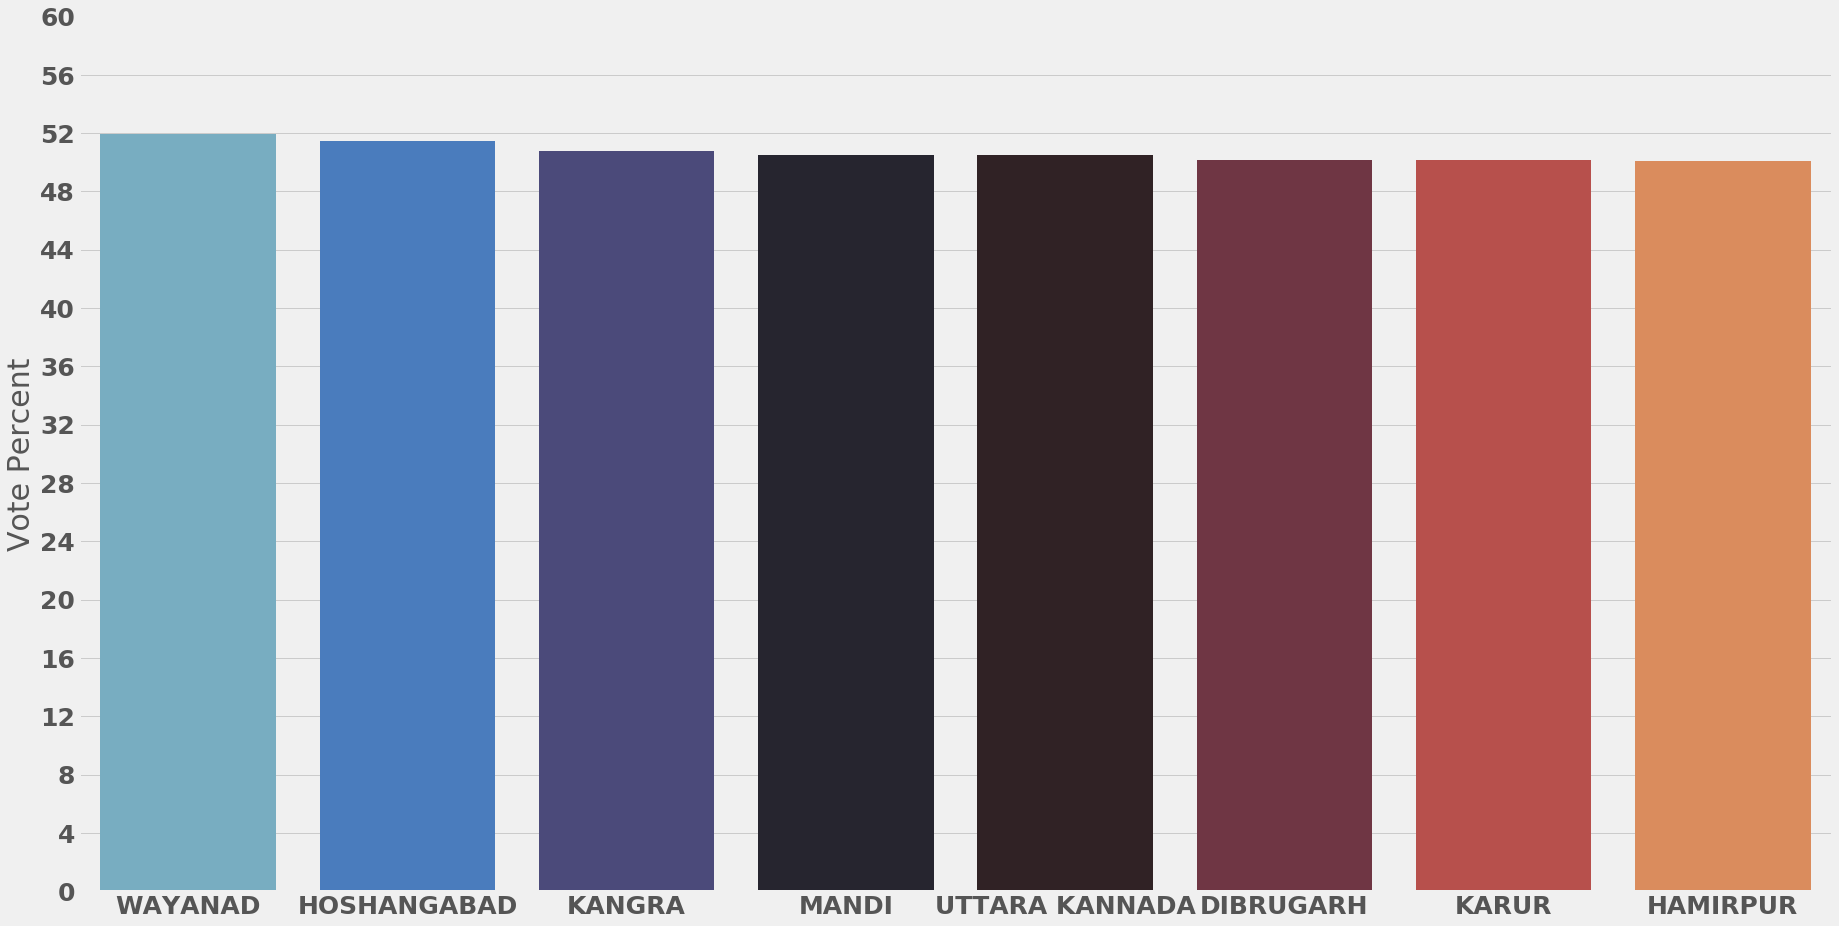

In [102]:
plt.style.use('seaborn-pastel')
yt=np.arange(0,61,4)
df3=df1.copy()
df3['Vote Percent']=(df3['TOTAL\nVOTES']/df3['TOTAL ELECTORS'])*100
df3.sort_values(by='Vote Percent',axis=0,ascending=False,inplace=True)
df3=df3.head(8)
plt.figure(figsize=(28,15))
sns.barplot(x='CONSTITUENCY',y='Vote Percent',palette='icefire',data=df3)
plt.xticks(fontsize=25,fontweight=1000)
plt.yticks(yt,fontsize=25,fontweight=1000)
plt.ylabel('Vote Percent',fontsize=30)
plt.xlabel('')
plt.show()

## Educational background of candidates

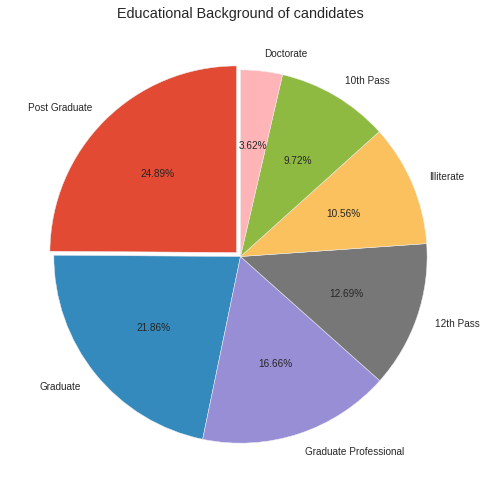

In [94]:
ill=['Others','Literate','5th Pass','Not Available','Illiterate','8th Pass']
df1['EDUCATION']=df1['EDUCATION'].apply(lambda x:'Illiterate' if x in ill else x)
plt.style.use('ggplot')
#plt.figure(figsize=(18,10))
labels=list(dict(df1['EDUCATION'].value_counts()))
data=list(df1['EDUCATION'].value_counts())
explode=[0.03,0,0,0,0,0,0]
plt.figure(figsize=(16,8))
plt.pie(data,explode,labels=labels,autopct='%1.2f%%',startangle=90)
plt.title('Educational Background of candidates')
plt.show()

# END OF REPORT
# Thanks for your time!